In [1]:
# importing  modules needed
from sklearn.datasets import fetch_mldata
import matplotlib
import numpy as np

# plot library 
import matplotlib.pyplot as plt
%matplotlib inline 

#supress warnings from displaying
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Fetch MNIST original data from online 
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
print "Number of Values in the data : ", len(X)

Number of Values in the data :  70000


In [3]:
#Let's seperate the data into train and test dataset 6000 as train and the rest as test dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

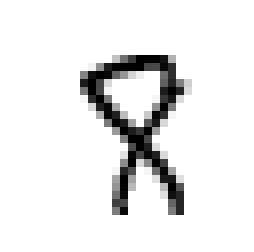

In [4]:
# Try displaying a sample image from the dataset
some_digit = X_train[35000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# Let's look into the shape of the X train data -> 784 
X_train.shape

(60000, 784)

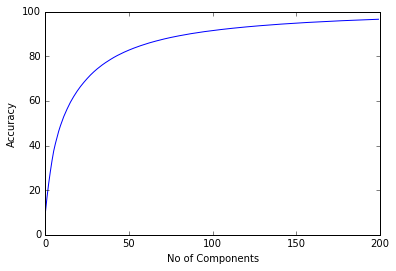

In [6]:
# Perform PCA using scikit learn 
# let's try plotting pca values till 200 to check whether 154 is a optimal value to decide
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
pca.fit(X_train)
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.ylabel('Accuracy')
plt.xlabel('No of Components')
plt.show()

In [7]:
# perform PCA using number of components as 154 has a ability to extract more than 90% of original
# value
pca = PCA(n_components=154)
pca.fit(X_train)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

# Display code c of a random image
print "Sample code of a image at random : ", X_reduced[35000]

# Display some of the features of random sample components
print pca.components_[:10]

Sample code of a image at random :  [ -3.25174614e+02   2.45498892e+02  -3.34229956e+02  -5.64292475e+00
   1.85836827e+02   3.67290436e+02   8.15170627e+01  -3.23050286e+02
  -1.25811948e+02  -8.32443266e+01  -6.63823215e+01  -9.98049840e+01
  -2.16578286e+02   1.95071676e+02   1.81034479e+02   1.53756272e+02
   1.59618468e+02   5.94839673e+01  -1.35427119e+02  -4.37648940e+01
  -2.79626764e+02  -1.77323216e+02   1.00311327e+02   4.42573713e+02
   1.48578174e+02   7.53501646e+01   3.00763299e+02  -1.49835249e+02
  -8.81203958e+01   2.78267260e+02  -3.46905037e+02   1.71952478e+02
   5.46216119e+01  -4.68564923e+01  -1.52726726e+02   3.10038618e+01
  -1.60548727e+01  -1.81202938e+02  -1.61672075e+02  -9.08815589e+01
  -1.42494264e+02  -1.34131667e+02  -5.78541700e+01   6.61451865e+01
   9.98641915e+01   3.19676892e+00   2.55396908e+01  -7.61263657e+01
  -2.27390148e+02  -1.19377351e+02   2.56743273e+01  -2.42835277e-02
  -4.75267398e+01  -5.95869759e+01  -6.21209259e+01   1.03731579e+0

Images about to be compared - Original vs Reconstrcted 


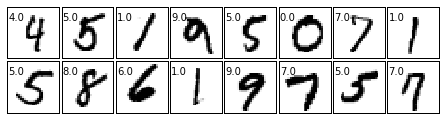

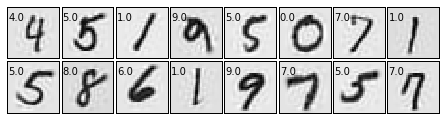

In [8]:
# Plot the image before doing PCA and the reconstructed image after recovering the image values 
# using PCA recovered components.

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))
print "Images about to be compared - Original vs Reconstrcted "


# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(16):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    some_digit = X_train[i]
    some_digit.shape
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
# label the image with the target value
    ax.text(0, 7, str(y_train[i]))
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(16):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    some_digit = X_recovered[i]
    some_digit.shape
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
#label the image with the target value
    ax.text(0, 7, str(y_train[i]))

# Show the plot
plt.show()

In [10]:
## Reducing the bits 
X_redbits1=(np.round(X_reduced*4,0)/4.0)
print "Code value of a random X variable",X_redbits1[1]
print "Reduced Code value of a random X variable", X_reduced[1]

# We try to recover the original from the reduced bits of values
X_recovered_reduced_digits = pca.inverse_transform(X_redbits1)


Code value of a random X variable [  3.40000000e+02  -2.35250000e+02  -1.60000000e+02  -7.50500000e+02
   2.77500000e+02  -6.11250000e+02  -3.94750000e+02  -6.75000000e+00
  -1.20500000e+02   2.87000000e+02  -4.15000000e+01  -6.72500000e+01
  -3.80000000e+01   4.42500000e+01   2.94250000e+02   3.35000000e+01
   1.19000000e+02   7.27500000e+01  -7.35000000e+01   3.18000000e+02
   1.22750000e+02   2.36000000e+02  -3.21500000e+02   1.21250000e+02
   6.82500000e+01   7.65000000e+01  -5.25000000e+01  -1.02000000e+02
   2.26750000e+02  -3.04500000e+02  -2.95250000e+02   1.32500000e+01
  -1.66500000e+02  -5.45000000e+01  -4.77500000e+01  -2.26750000e+02
   1.19000000e+02   1.41500000e+02   6.15000000e+01   3.41250000e+02
   1.69750000e+02   8.22500000e+01  -9.85000000e+01  -3.70000000e+01
   1.16250000e+02  -2.02000000e+02   1.66250000e+02  -7.30000000e+01
  -1.50000000e+02   1.23000000e+02   3.00750000e+02   5.55000000e+01
   1.23250000e+02   3.72500000e+01   5.92500000e+01  -7.32500000e+01


Images about to be compared - Original vs Reconstrcted 


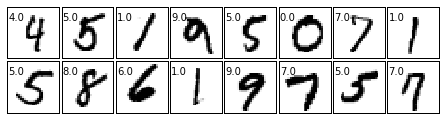

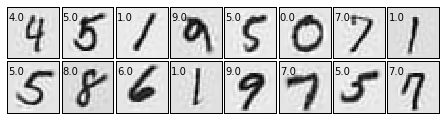

In [11]:
# Plot the normal sample images and also reconstructed image that are reduced by some number of bits 
# We can see the difference between the images  

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))
print "Images about to be compared - Original vs Reconstrcted "
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(16):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    some_digit = X_train[i]
    some_digit.shape
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
# label the image with the target value
    ax.text(0, 7, str(y_train[i]))
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(16):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    some_digit = X_recovered_reduced_digits[i]
    some_digit.shape
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
#label the image with the target value
    ax.text(0, 7, str(y_train[i]))

# Show the plot
plt.show()